            dia   valor
0    2003-05-20  3.0133
1    2003-05-21  3.0101
2    2003-05-22  2.9834
3    2003-05-23  2.9437
4    2003-05-26  2.9557
...         ...     ...
4226 2020-03-12  4.8825
4227 2020-03-13  4.7355
4228 2020-03-16  4.9464
4229 2020-03-17  5.0489
4230 2020-03-18  5.1101

[4231 rows x 2 columns]
           Date  Price US$
0    2003-05-20       9.75
1    2003-05-21       9.75
2    2003-05-22       9.66
3    2003-05-23       9.71
4    2003-05-26       9.19
...         ...        ...
4164 2020-03-12      16.56
4165 2020-03-13      16.53
4166 2020-03-16      15.59
4167 2020-03-17      15.50
4168 2020-03-18      14.65

[4169 rows x 2 columns]
           data  Reais.Açúcar
0    2003-05-20     29.379675
1    2003-05-21     29.348475
2    2003-05-22     28.819644
3    2003-05-23     28.583327
4    2003-05-26     27.162883
...         ...           ...
4226 2020-03-12     80.854200
4227 2020-03-13     78.277815
4228 2020-03-16     77.114376
4229 2020-03-17     78.257950
4230 202

Text(0.5, 1.0, 'Variação do preço do Açúcar em Reais')

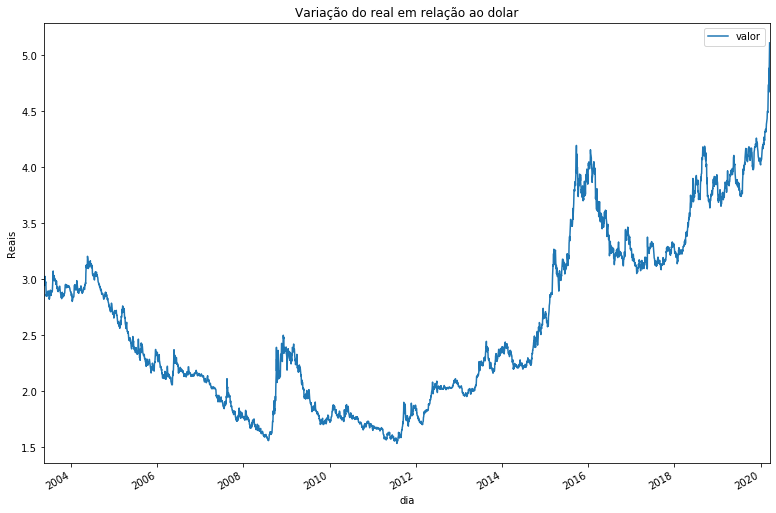

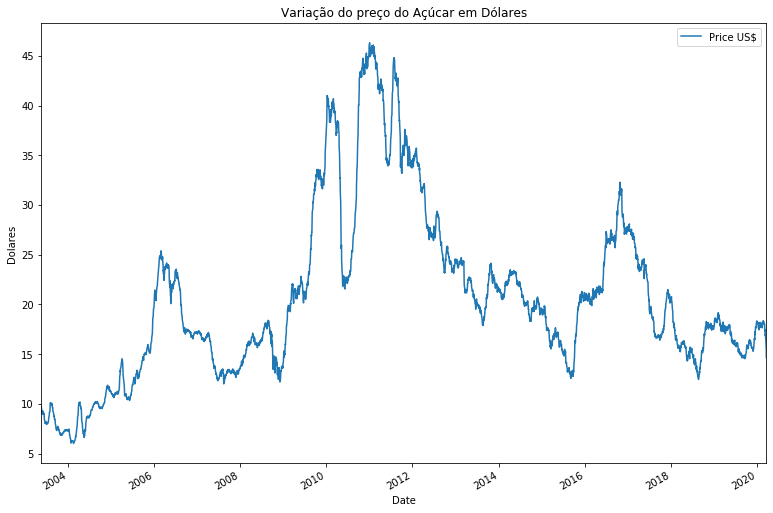

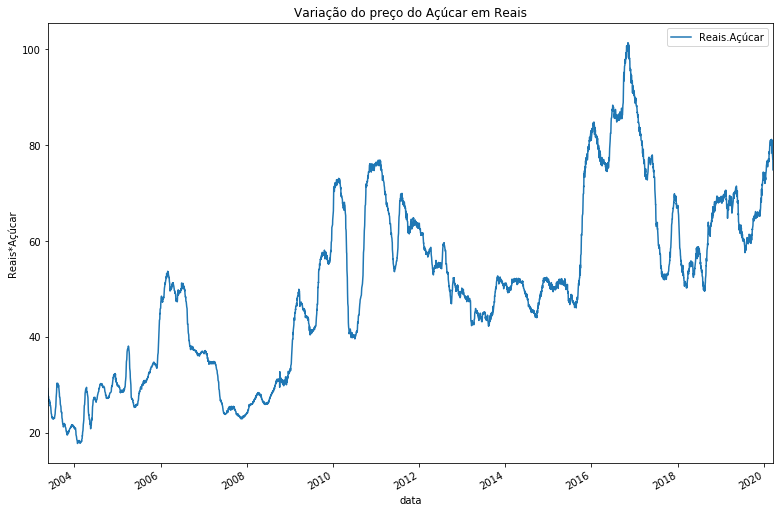

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13,9)
import numpy as np
#uiyjBnn6pvswZEieennW
!pip install quandl
import quandl

#GETDATA E AJUSTES

url_dolar = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.10813/dados?formato=csv"
dados_sugar = quandl.get("CEPEA/SUGAR", authtoken="uiyjBnn6pvswZEieennW")


df_dolar = pd.read_csv(url_dolar, sep=';' ,skiprows=4614, names= ['dia', 'valor'], decimal=",")
df_sugar = pd.DataFrame(dados_sugar)

#ajustando parametros dataframe dolar
df_dolar.dia = pd.to_datetime(df_dolar.dia, format='%d/%m/%Y')
#df_dolar.set_index('dia', inplace = True)
df_dolar.dropna(axis=0, how='any')


#printa na tela dataframe do dolar
print (df_dolar)

#Ajustando parametros do daataframe do açucar
df_sugar = df_sugar.reset_index()
df_sugar.dropna(axis=0, how='any')

#printa na tela dataframe do açucar
df_sugar= df_sugar.drop(['Daily %' , 'Monthly %'], axis=1)
print (df_sugar)

#GRAFICOS

#grafico dolar
graf_dolar = df_dolar.plot(x= 'dia', y = 'valor')
graf_dolar.legend()
graf_dolar.set_ylabel('Reais')
graf_dolar.set_title('Variação do real em relação ao dolar')

#grafico açucar
graf_sugar = df_sugar.plot(x= 'Date', y= 'Price US$')
graf_sugar.legend()
graf_sugar.set_ylabel('Dolares')
graf_sugar.set_title('Variação do preço do Açúcar em Dólares')

df_final = pd.DataFrame()



for x in df_dolar.index:
  for y in df_sugar.index:
    if df_dolar.iloc[x,0] == df_sugar.iloc[y,0]:
      df_final.loc[x,'data'] = df_dolar.iloc[x,0]
      df_final.loc[x, 'Reais.Açúcar'] = (df_dolar.iloc[x,1]*df_sugar.iloc[y,1])
      y=y+1
      #print (df_dolar.iloc[x,1]*df_sugar.iloc[y,1])

print(df_final)

#grafico açucar
graf_final = df_final.plot(x= 'data', y= 'Reais.Açúcar')
graf_final.legend()
graf_final.set_ylabel('Reais*Açúcar')
graf_final.set_title('Variação do preço do Açúcar em Reais')

.